In [1]:
'''
Analysis for "Technical considerations of MSK femoral cartilage segmentation using CNNs"

@author: Arjun Desai, Stanford University
         (c) Stanford University, 2018
'''

import sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fsize = 12
params = {'legend.fontsize': fsize*0.925,          
          'axes.labelsize': fsize,
          'axes.titlesize':fsize*1.25,
          'xtick.labelsize':fsize*0.925,
          'ytick.labelsize':fsize*0.925 }
sns.set(palette='pastel', rc=params)


import os
import numpy as np
import scipy.io as sio

import seaborn as sns

import utils
from analysis import analysis_funcs as af
from analysis import stats

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
AUG_YES = '/bmrNAS/people/arjun/msk_seg_networks/architecture_limit/unet_2d/2018-11-26-00-56-55/'
AUG_NO = '/bmrNAS/people/arjun/msk_seg_networks/augment_limited/unet_2d/2018-11-07-16-05-15/'

Text(0.5,1,'Measuring Overfitting - Augmented Data')

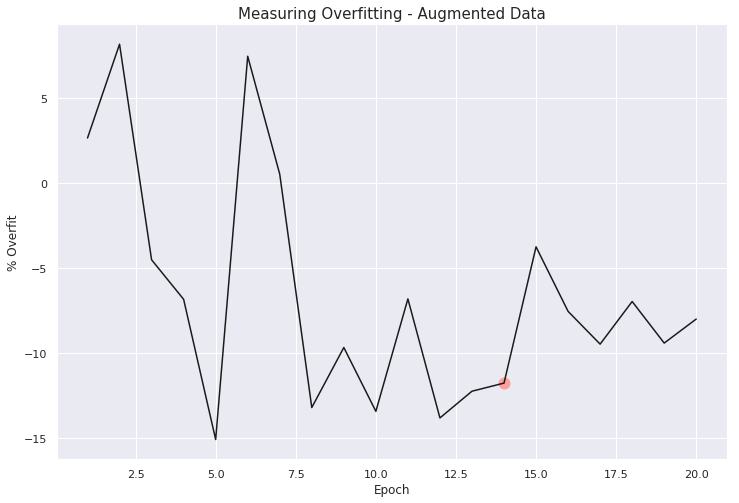

In [3]:
data_aug = utils.load_pik(os.path.join(AUG_YES, 'pik_data.dat'))
data_aug = {'epochs': np.asarray(data_aug[0]), 'train_loss': np.asarray(data_aug[1]), 'val_loss': np.asarray(data_aug[2])}
epoch_c = 14 # critical epoch - i.e. epoch with lowest val loss

percent_overfit = (data_aug['val_loss']-data_aug['train_loss'])/data_aug['train_loss']*100

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(data_aug['epochs'], percent_overfit, color='k')
ax.scatter(epoch_c, percent_overfit[epoch_c-1], s=120, color='r')
ax.set_ylabel('% Overfit')
ax.set_xlabel('Epoch')
ax.set_title('Measuring Overfitting - Augmented Data')

Text(0.5,1,'Measuring Overfitting - Non Augmented Data')

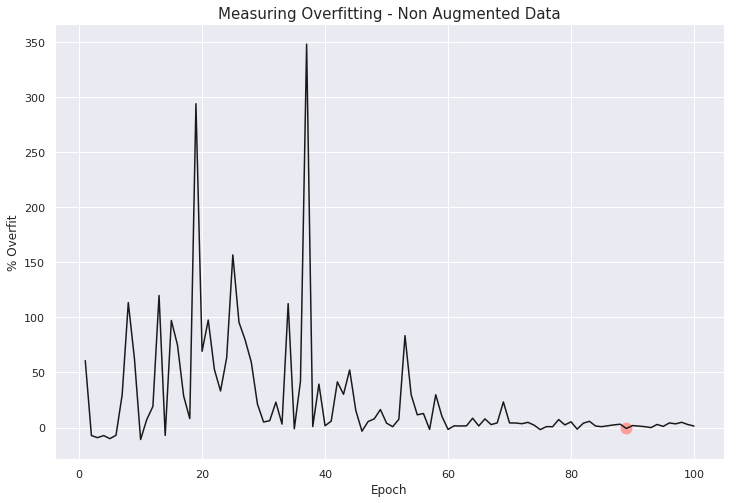

In [4]:
data_no_aug = utils.load_pik(os.path.join(AUG_NO, 'pik_data.dat'))
data_no_aug = {'epochs': np.asarray(data_no_aug[0]), 'train_loss': np.asarray(data_no_aug[1]), 'val_loss': np.asarray(data_no_aug[2])}
epoch_c = 89 # critical epoch - i.e. epoch with lowest val loss

percent_overfit = (data_no_aug['val_loss']-data_no_aug['train_loss'])/data_no_aug['train_loss']*100

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(data_no_aug['epochs'], percent_overfit, color='k')
ax.scatter(epoch_c, percent_overfit[epoch_c-1], color='r', s=120)
ax.set_ylabel('% Overfit')
ax.set_xlabel('Epoch')
ax.set_title('Measuring Overfitting - Non Augmented Data')